## **Домашнее задание Pandas**
### **Pima Indian Diabetes**

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].fillna(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].median())

__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [6]:
data[(data.Age > 50) & (data.Class == 0)].shape[0]

43

__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [7]:
data.nlargest(3, 'Pregnancies')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [8]:
data[(data.Age > 30) & (data.Age < 40) & (data.Pregnancies >= 3)].shape[0]
# кстати, количество беременностей необязательно равно количеству родившихся детей :(

115

__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [9]:
round(data[(data.BloodPressure >= 80) & (data.BloodPressure <= 89)].shape[0]/data.shape[0]*100,1)

18.9

__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
data[(data.BMI >= 30) & (data.BloodPressure > data.BloodPressure.mean())].shape[0]

251

__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [11]:
# Glucose
data.groupby('Class')['Glucose'].mean()

Class
0    110.682000
1    142.130597
Name: Glucose, dtype: float64

In [12]:
# BloodPressure
data.groupby('Class')['BloodPressure'].mean()

Class
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

In [13]:
# Insulin
data.groupby('Class')['Insulin'].mean()

Class
0    127.792000
1    164.701493
Name: Insulin, dtype: float64

__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

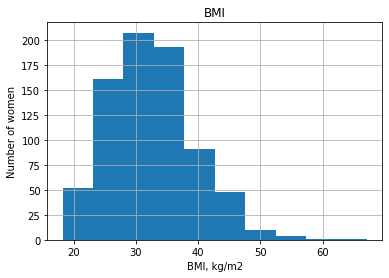

In [14]:
bmi_hist = data.BMI.hist()
bmi_hist.set_title('BMI')
bmi_hist.set_xlabel('BMI, kg/m2')
bmi_hist.set_ylabel('Number of women');

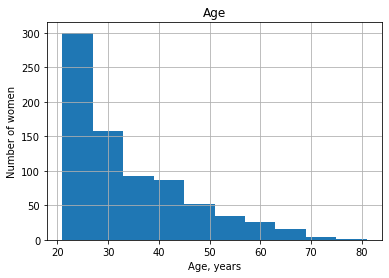

In [15]:
age_hist = data.Age.hist()
age_hist.set_title('Age')
age_hist.set_xlabel('Age, years')
age_hist.set_ylabel('Number of women');

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

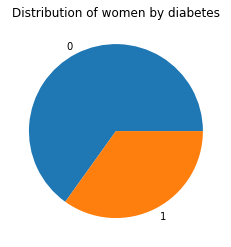

In [16]:
class_pie = data.groupby('Class').size().plot(kind='pie')
class_pie.set_title('Distribution of women by diabetes')
class_pie.set_ylabel('');

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


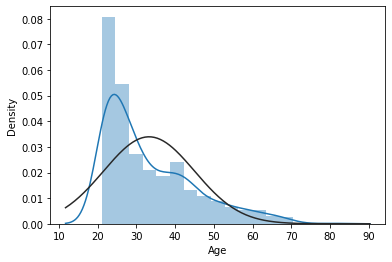

In [17]:
sns.distplot(data.Age, fit=norm);

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


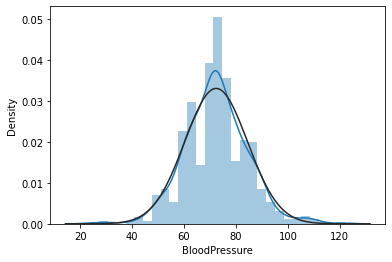

In [18]:
sns.distplot(data.BloodPressure, fit=norm);

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

In [19]:
# Что значит среднее число больных диабетом??? Процент?

In [20]:
data.groupby('Pregnancies')['Class'].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Class, dtype: float64

In [21]:
diab_preg = data.groupby('Pregnancies')['Class'].mean()*100
diab_preg = diab_preg.to_frame(name='ShareDiabetes').reset_index()

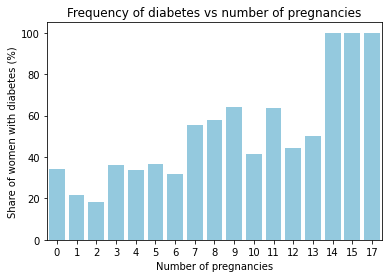

In [22]:
diab_preg_bar = sns.barplot(x='Pregnancies', y='ShareDiabetes', data=diab_preg, color='skyblue')
diab_preg_bar.set(xlabel='Number of pregnancies', ylabel='Share of women with diabetes (%)', title='Frequency of diabetes vs number of pregnancies');

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [23]:
data['wasPregnant'] = [1 if i > 0 else 0 for i in data['Pregnancies']]
data[['Pregnancies', 'wasPregnant']].head()

,Pregnancies,wasPregnant
0,6,1
1,1,1
2,8,1
3,1,1
4,0,0


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [24]:
round(data.groupby('wasPregnant')['Class'].mean()*100,1)

wasPregnant
0    34.2
1    35.0
Name: Class, dtype: float64

__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [25]:
data['bodyType'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, 30, data['BMI'].max()+1], right=True, labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'], include_lowest=True)
data[['BMI', 'bodyType']].head(10)

,BMI,bodyType
0,33.600000,Obesity
1,26.600000,Overweight
2,23.300000,Normal weight
3,28.100000,Overweight
4,43.100000,Obesity
5,25.600000,Overweight
6,31.000000,Obesity
7,35.300000,Obesity
8,30.500000,Obesity
9,32.457464,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [26]:
n_healthy = ((data.bodyType == 'Normal weight') & (data.BloodPressure >= 80) & (data.BloodPressure <= 89)).sum()
n_healthy_diab = ((data.bodyType == 'Normal weight') & (data.BloodPressure >= 80) & (data.BloodPressure <= 89) & (data.Class == 1)).sum()
print(round(n_healthy_diab/n_healthy*100,1))

10.0
